In [1]:
import jax.numpy as jnp
import jax
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from glue_module.glue_analysis import glue_solver

In [2]:
def generate_gmm_data(key, means, sigma, points_per_centroid):
    """
    Generates synthetic classification data based on Gaussian clusters.
    
    Args:
        key: jax.random.PRNGKey
        means: Array of shape (P, mu_count, N) defining centroid locations.
        sigma: Float representing standard deviation (uniform scalar).
        points_per_centroid: Int, number of points to generate per centroid.
        
    Returns:
        points: Array of shape (P, total_points_per_class, N)
    """
    # 1. Extract dimensions from the means array
    P, mu_count, N = means.shape
    # 2. Generate Noise
    noise_shape = (P, mu_count, points_per_centroid, N)
    epsilon = jax.random.normal(key, shape=noise_shape)
    # 3. Broadcast Means
    means_expanded = means[:, :, jnp.newaxis, :]
    # 4. Apply Gaussian transformation: X = mu + sigma * noise
    raw_points = means_expanded + (sigma * epsilon)
    # 5. Reshape to required output
    points = raw_points.reshape(P, -1, N)
    return points

In [3]:
def plot_data(data):
    """
    Plots generated GMM data in 2D or 3D based on the feature dimension N.
    
    Args:
        data: JAX array of shape (P, n_total_points, N)
        means: Optional JAX array of shape (P, mu_count, N) for plotting centroids
    """
    P, n_points, N = data.shape
    colors = [
        '#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', 
        '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'
    ]
    # --- Setup Figure ---
    fig = plt.figure(figsize=(6, 4))
    # --- Check Dimensionality ---
    if N == 2:
        ax = fig.add_subplot(111)
        ax.set_title(f"2D Data Visualization\nShape: {data.shape}")
    elif N == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(f"3D Data Visualization\nShape: {data.shape}")
    else:
        raise ValueError(f"Plotting only supported for N=2 or N=3, but got N={N}")

    # --- Plotting Loop ---
    for i in range(P):
        c = colors[i % len(colors)]
        class_points = data[i]
        
        # 2D Plotting
        if N == 2:
            ax.scatter(class_points[:, 0], 
                       class_points[:, 1], 
                       label=f"Class {i}", 
                       c=c)
                
        # 3D Plotting
        elif N == 3:
            ax.scatter(class_points[:, 0], 
                       class_points[:, 1], 
                       class_points[:, 2], 
                       label=f"Class {i}", 
                       c=c)
# --- Labels and Grid (Origin lines only) ---
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    
    # Remove standard grid
    ax.grid(False)

    if N == 2:
        # Draw X and Y lines at 0
        ax.axhline(0, color='black', linewidth=1.2, zorder=1)
        ax.axvline(0, color='black', linewidth=1.2, zorder=1)
    elif N == 3:
        ax.set_zlabel("Feature 3")
        # Draw X, Y, and Z lines through the origin
        # We use get_xlim etc. to ensure lines span the current view
        xlim, ylim, zlim = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()
        ax.plot(xlim, [0, 0], [0, 0], color='black', linewidth=1.2) # X-axis
        ax.plot([0, 0], ylim, [0, 0], color='black', linewidth=1.2) # Y-axis
        ax.plot([0, 0], [0, 0], zlim, color='black', linewidth=1.2) # Z-axis
        
    ax.legend()
    plt.show()

### Well Separated Two Classes

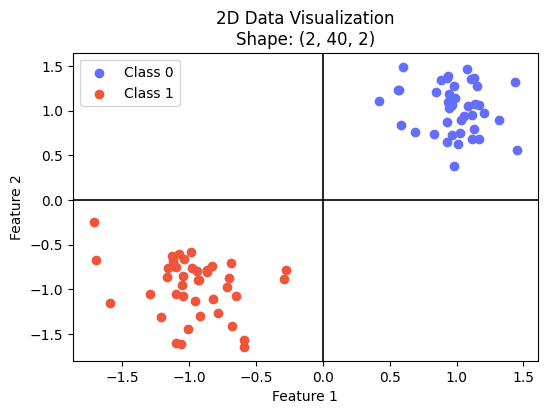

In [4]:
P = 2
n_points_per_cloud = 40
M = 10
N = 2
n_t = 40
sigma = 0.3
mus = jnp.array([[[1.0, 1.0]],[[-1.0, -1.0]]])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

In [5]:
# Use glue solver and plot results:
gl_key = jax.random.split(key)
gl_solver = glue_solver(key, P, M, N, n_t)
geometries = gl_solver.run(data) # 14 s after jitted sample_anchor_points

In [6]:
# show the plots
figs = gl_solver.make_plots()

In [7]:
print(f"Geometries: ")
for g in geometries:
    print(g)
for f in figs:
    f.show()

Geometries: 
2.3493884
0.9212705
3.202869
0.8185005
0.6405441
-0.17430776
1.1912694


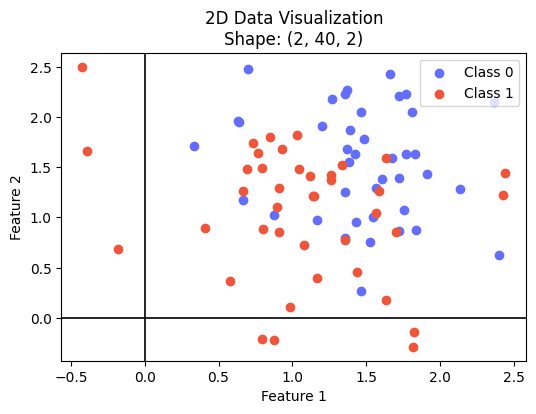

In [8]:
P = 2
n_points_per_cloud = 40
M = 10
N = 2
n_t = 40
sigma = 0.6
mus = jnp.array([[[1.5, 1.5]],[[1.0, 1.0]]])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

In [9]:
# Use glue solver and plot results:
gl_key = jax.random.split(key)
gl_solver = glue_solver(key, P, M, N, n_t)
geometries = gl_solver.run(data) # 14 s after jitted sample_anchor_points

In [10]:
# show the plots
figs = gl_solver.make_plots()

In [11]:
print(f"Geometries: ")
for g in geometries:
    print(g)
for f in figs:
    f.show()

Geometries: 
1.0854579
0.9212708
10.865849
-0.9923256
-0.8624116
-0.17767757
1.0946509


# Poorly separated two classes

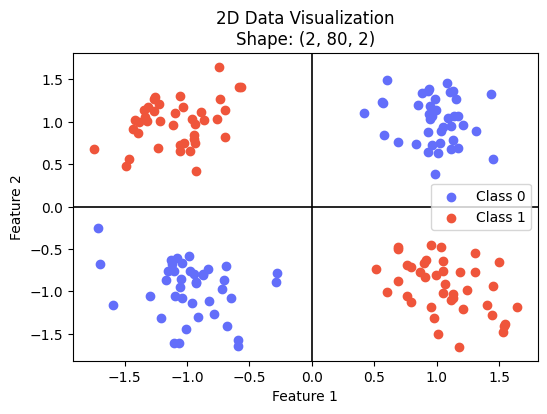

In [12]:
P = 2
n_points_per_cloud = 40
M = 10
N = 2
n_t = 40
sigma = 0.3
mus = jnp.array([[[1.0, 1.0],[-1.0, -1.0]],
                 [[-1.0, 1.0], [1.0, -1.0]]])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

In [13]:
# Use glue solver and plot results:
gl_key = jax.random.split(key)
gl_solver = glue_solver(key, P, M, N, n_t)
geometries = gl_solver.run(data) # 14 s after jitted sample_anchor_points

In [14]:
print(f"Geometries: ")
for g in geometries:
    print(g)
# show the plots
figs = gl_solver.make_plots()
for f in figs:
    f.show()

Geometries: 
1.0854573
0.92127067
13.582647
0.5411435
0.081105135
0.049999364
1.091341


### Many Classes, one center

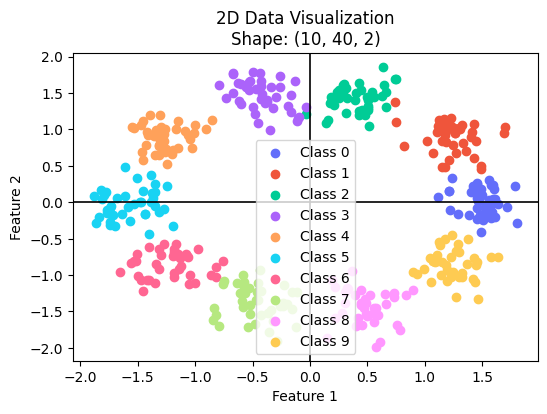

In [15]:
P = 10
n_points_per_cloud = 40
M = 10
N = 2
n_t = 40
sigma = 0.2
r = 1.5
mus = jnp.array([[[r*jnp.cos(2*jnp.pi*pix/P), r*jnp.sin(2*jnp.pi*pix/P)]] for pix in range(P)])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

In [16]:
# Use glue solver and plot results:
gl_key = jax.random.split(key)
gl_solver = glue_solver(key, P, M, N, n_t)
geometries = gl_solver.run(data) # 14 s after jitted sample_anchor_points

In [17]:
for g in geometries:
    print(g)
# show the plots
figs = gl_solver.make_plots()
for f in figs:
    f.show()

5.427286
0.18425414
2.7304668
-0.11028326
-0.0060083126
-0.010638846
6.155249


### 3D data

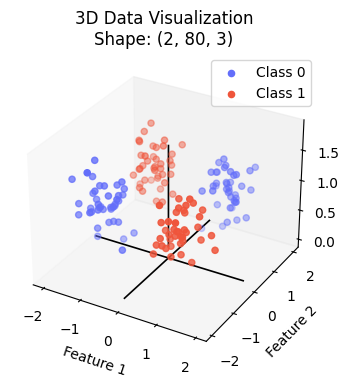

In [18]:
P = 2
n_points_per_cloud = 40
M = 3 
N = 3
n_t = 40
sigma = 0.3
mus = jnp.array([[[1.0, 1.0, 1.0],[-1.0, -1.0, 1.0]],
                 [[-1.0, 1.0, 1.0], [1.0, -1.0, 1.0]]])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

In [19]:
# Use glue solver and plot results:
gl_key = jax.random.split(key)
gl_solver = glue_solver(key, P, M, N, n_t)
geometries = gl_solver.run(data) # 14 s after jitted sample_anchor_points

In [20]:
for g in geometries:
    print(g)
# show the plots
figs = gl_solver.make_plots()
for f in figs:
    f.show()

0.93377525
1.0707738
4.067743
-0.19443521
-0.2806349
-0.020668402
0.9903452


### Many 3D clouds

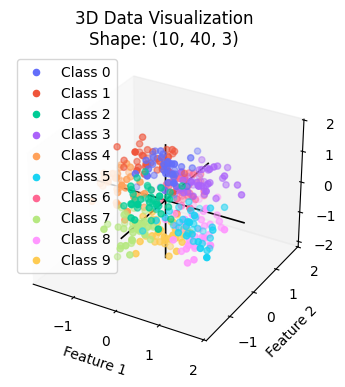

In [21]:

def get_equidistant_sphere_points(P, r=1.0):
    i = jnp.arange(P)
    
    # 1. Calculate phi (inclination) using linear spacing of z
    # This ensures points aren't "clumped" at the poles
    z = (1 - (2 * i) / (P - 1))  # ranges from 1 to -1
    phi = jnp.arccos(z)
    
    # 2. Calculate theta (azimuth) using the Golden Angle
    golden_angle = jnp.pi * (3 - jnp.sqrt(5))
    theta = golden_angle * i
    
    # 3. Convert Spherical to Cartesian
    x = r * jnp.sin(phi) * jnp.cos(theta)
    y = r * jnp.sin(phi) * jnp.sin(theta)
    z = r * jnp.cos(phi)
    
    # Stack into [P, 1, 3] to match your original "mus" shape
    return jnp.stack([x, y, z], axis=-1)[:, jnp.newaxis, :]



# Parameters
P = 10   # Number of points
r = 4.0    # Radius
phi = jnp.pi / 2  # Inclination (e.g., pi/2 puts points on the equator)

# Generating the 3D mus
mus = get_equidistant_sphere_points(P)

n_points_per_cloud = 40
M = 3 
N = 3
n_t = 40
sigma = 0.3

seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

In [22]:
# Use glue solver and plot results:
gl_key = jax.random.split(key)
gl_solver = glue_solver(key, P, M, N, n_t)
geometries = gl_solver.run(data) # 14 s after jitted sample_anchor_points

In [23]:
for g in geometries:
    print(g)
# show the plots
figs = gl_solver.make_plots()
for f in figs:
    f.show()

3.7744908
0.2649364
3.363269
-0.016038563
-0.008042943
-4.971756e-05
4.108175
